# Example halo-model power spectrum calculation
In this example, we will calculate the halo-model matter power spectrum.

In [1]:
import numpy as np
import pyccl as ccl
import pylab as plt
%matplotlib inline

We begin by defining a set of cosmological parameters, as usual:

In [2]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=0.96, Neff=3.04,
                      transfer_function='class',
                      matter_power_spectrum='halofit',
                      mass_function='shethtormen',
                      halo_concentration='duffy2008'
                     )

Note that we have explicitly defined how transfer functions should be calculated for the matter power spectrum, by using the `transfer_function` keyword argument. The following types of transfer function are available:

In [3]:
print(ccl.core.transfer_function_types.keys())

dict_keys(['none', 'emulator', 'fitting_function', 'eisenstein_hu', 'bbks', 'boltzmann', 'boltzmann_camb', 'camb', 'boltzmann_class', 'class'])


The default is `boltzmann_class`, which uses a full transfer function calculation from the CLASS Boltzmann code. This is highly accurate at the level of linear pertubation theory, but does not account for non-linear gravitational interactions which are dominant at smaller scales in the late Universe.

The `Cosmology()` object constructor also has a `matter_power_spectrum` argument that can be changed:

In [4]:
print(ccl.core.matter_power_spectrum_types.keys())

dict_keys(['halo_model', 'halofit', 'linear', 'emu'])


which determines what is output by the ```ccl.nonlin_matter_power``` function. The default is ```halofit```, a fitting function for the non-linear power.

We can also specify the halo mass function and the mass-concentration relation that we want to use in the halo-model calculation. The following types are available:

In [5]:
print('Mass functions:', ccl.core.mass_function_types.keys())
print('Halo concentration:', ccl.core.halo_concentration_types.keys())

Mass functions: dict_keys(['angulo', 'tinker', 'tinker10', 'watson', 'shethtormen'])
Halo concentration: dict_keys(['bhattacharya2011', 'duffy2008', 'constant_concentration'])


Consistency of halo definition is enforeced for each mass function or halo concentration. The halo-model power spectrum calculation currently makes the assumption that haloes have the 'virial' definition for their masses, so a mass function and halo concentration must be chosen that are consistent with this assumption.

### Calculate the matter power spectrum
Now, let's calculate various different types of power spectra...

In [6]:
# Wavenumber
kmin=1e-4
kmax=1e1
nk=128
k = np.logspace(np.log10(kmin), np.log10(kmax), nk) 

# Scale factor
a = 1. 

# Calculate all these different P(k)
pk_li = ccl.linear_matter_power(cosmo, k, a)
pk_nl = ccl.nonlin_matter_power(cosmo, k, a)
pk_hm = ccl.halomodel_matter_power(cosmo, k, a)
pk_1h = ccl.halomodel.onehalo_matter_power(cosmo, k, a)
pk_2h = ccl.halomodel.twohalo_matter_power(cosmo, k, a)

...and make some plots:

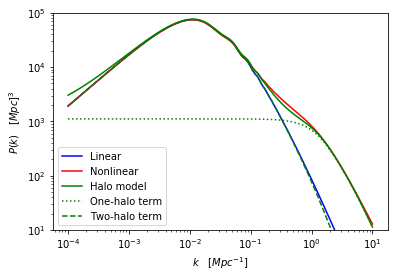

In [7]:
plt.plot(k, pk_li, 'b-',  label='Linear')
plt.plot(k, pk_nl, 'r-',  label='Nonlinear')
plt.plot(k, pk_hm, 'g-',  label='Halo model')
plt.plot(k, pk_1h, 'g:',  label='One-halo term')
plt.plot(k, pk_2h, 'g--', label='Two-halo term')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k\quad[Mpc^{-1}]$')
plt.ylabel(r'$P(k)\quad[Mpc]^3$')
plt.ylim([1e1,1e5])
plt.legend()
plt.show()

Above we make a plot of the power spectrum from linear theory, nonlinear theory
(by default the HALOFIT fitting function in CCL) and the halo-model power spectrum.
We also plot the contribution from the one- and two-halo terms for the halo model, the total is the sum.
Visually we see that the halo model power looks quite similar to the model for the nonlinear power.
However, we note that the halo-model power underpredicts the power around the transition between the one-
and two-halo terms and also that there is a strange contribution from the one-halo term at extremely large scales.

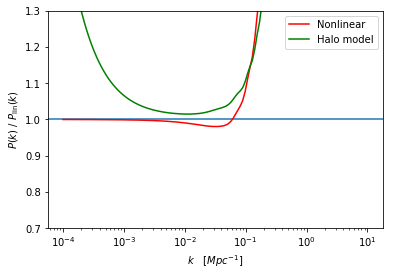

In [8]:
plt.axhline(1.)
plt.plot(k, pk_nl/pk_li, 'r-', label='Nonlinear')
plt.plot(k, pk_hm/pk_li, 'g-', label='Halo model')
plt.xscale('log')
plt.ylim([0.7,1.3])
plt.xlabel(r'$k\quad[Mpc^{-1}]$')
plt.ylabel(r'$P(k)$ / $P_\mathrm{lin}(k)$')
plt.legend()
plt.show()

Above we plot the ratio of the nonlinear and halo-model power to linear theory.
These curves diverge from the linear theory at the 10% level around k ~ 0.01h/Mpc.
We also see the problem with the halo model at very large scales where the one-halo term unphysically becomes
important for the power spectrum. This is a well-known problem with the fundamentals of the halo model
(see Cooray & Sheth 2002) and if you can think of a clever way to solve this issue you should publish it.

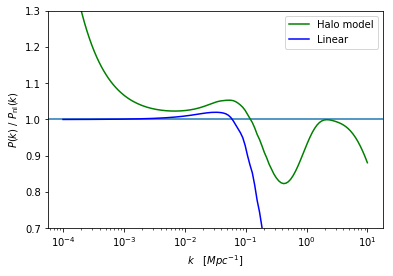

In [9]:
plt.axhline(1.)
plt.plot(k, pk_hm/pk_nl, 'g-', label='Halo model')
plt.plot(k, pk_li/pk_nl, 'b-', label='Linear')
plt.xscale('log')
plt.ylim([0.7,1.3])
plt.xlabel(r'$k\quad[Mpc^{-1}]$')
plt.ylabel(r'$P(k)$ / $P_\mathrm{nl}(k)$')
plt.legend()
plt.show()

Above we plot the ratio of the halo-model and linear power compared to the nonlinear fitting function.
The fitting function matches accurate measurements from simulations at the ~5% level but we see that the
halo-model deviates from the fitting function by more than this amount. A particular problem is the lack of
power in the transition region between the one- and two-halo terms, which is around k = 0.3h/Mpc in this plot.

We should not be surprised by this result, however. Many approximations go into the simple halo-model calculation
used here and the mismatch between the halo model and nonlinear theory is a result of these simplifications.
Still, the halo-model is useful approxmiate description of the power spectrum, so don't be too sad.